In [1]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State

In [2]:
def main_algo(maze: Maze, rewards, eps=0.1, alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        

        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)

        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    return steps_per_iter

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


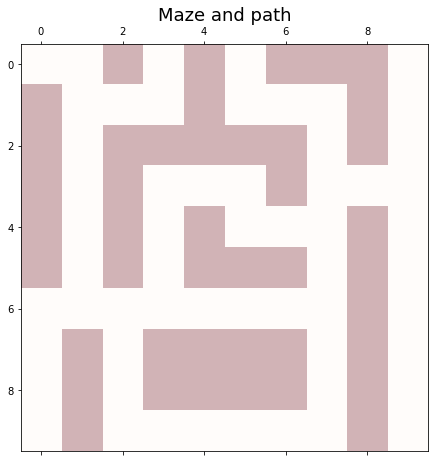

In [3]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[474, 438, 3810, 842, 894, 572, 1630, 102, 136, 338, 604, 528, 1232, 1358, 924, 744]
Made EGreedy
[924, 704, 2434, 1836, 696, 1290, 932, 522, 1496, 1780, 1366, 666, 1558, 2000, 210, 262]
Made EGreedy
[356, 2216, 478, 1918, 920, 618, 574, 912, 1130, 906, 608, 482, 1556, 482, 1930, 494]
Made EGreedy
[1292, 1230, 1282, 6130, 2114, 206, 978, 1176, 342, 4364, 1516, 926, 494, 1066, 654, 864]
Made EGreedy
[3878, 614, 466, 800, 1180, 832, 632, 824, 404, 1060, 2486, 1354, 910, 306, 256, 528]
Made EGreedy
[442, 470, 1242, 852, 288, 2020, 540, 716, 754, 2060, 1274, 3056, 1458, 1374, 696, 2684]
Made EGreedy
[1046, 340, 422, 310, 620, 1726, 1958, 1462, 2314, 290, 140, 584, 194, 596, 796, 2146]
Made EGreedy
[1474, 510, 532, 202, 1506, 406, 292, 1310, 3512, 2826, 1078, 492, 2768, 2422, 192, 1068]
Made EGreedy
[888, 1414, 1646, 3364, 2686, 1920, 336, 1832, 1182, 584, 594, 4874, 444, 400, 1730, 1780]
Made EGreedy
[204, 2194, 2962, 1198, 2342, 12

(0.0, 5000.0)

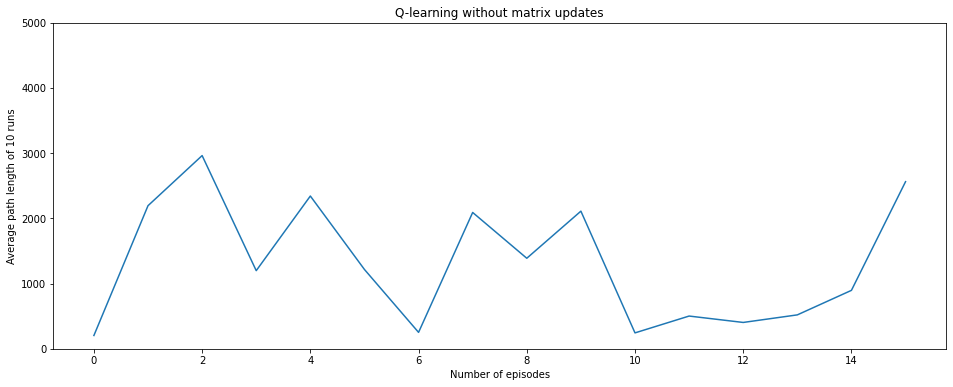

In [4]:
#1.4

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]
eps=0.1
alfa=0.7
gamma=0.9
max_iter=30000
max_episodes=16
steps_per_episode = []
runs_reaching_episode = []


for i in range(10):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    steps_per_episode = []
    runs_reaching_episode = []
    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        #learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break
        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append(robot.nr_of_actions_since_reset)
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    print(steps_per_iter)

    for i in range(len(steps_per_iter)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append(0)
    
    for i in range(len(steps_per_iter)):
        steps_per_episode[i] += steps_per_iter[i]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode) / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(16,6))
plt.title("Q-learning without matrix updates")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 5000)

Ready reading maze file ../data/easy_maze.txt
Made EGreedy
[(180, 0), (8208, 0), (730, 0), (684, 0), (1460, 0), (2362, 0), (4456, 0), (654, 0), (100, 0), (204, 0), (780, 0), (88, 0), (66, 0), (224, 0), (512, 0), (26, 0), (2156, 0), (268, 0), (104, 0), (22, 0), (44, 0), (30, 0), (34, 0), (26, 0), (24, 0), (28, 0), (24, 0), (24, 0), (24, 0), (24, 0), (22, 0), (22, 0), (24, 0), (22, 0), (24, 0), (22, 0), (24, 0), (26, 0), (24, 0), (24, 0)]
Made EGreedy
[(3596, 0), (390, 0), (1122, 0), (178, 0), (746, 0), (3812, 0), (1232, 0), (3044, 0), (706, 0), (806, 0), (1708, 0), (144, 0), (556, 0), (2894, 0), (492, 0), (3680, 0), (44, 0), (416, 0)]
Made EGreedy
[(206, 0), (514, 0), (766, 0), (2332, 0), (9592, 0), (4146, 0), (572, 0), (2006, 0), (1130, 0), (3210, 0), (452, 0), (250, 0), (96, 0), (434, 0), (72, 0), (2800, 0), (756, 0)]
Made EGreedy
[(2580, 0), (6040, 0), (3884, 0), (1080, 0), (168, 0), (2946, 0), (4420, 0), (72, 0), (3726, 0), (4242, 0), (808, 0)]
Made EGreedy
[(2490, 0), (11568, 0), (

(0.0, 5000.0)

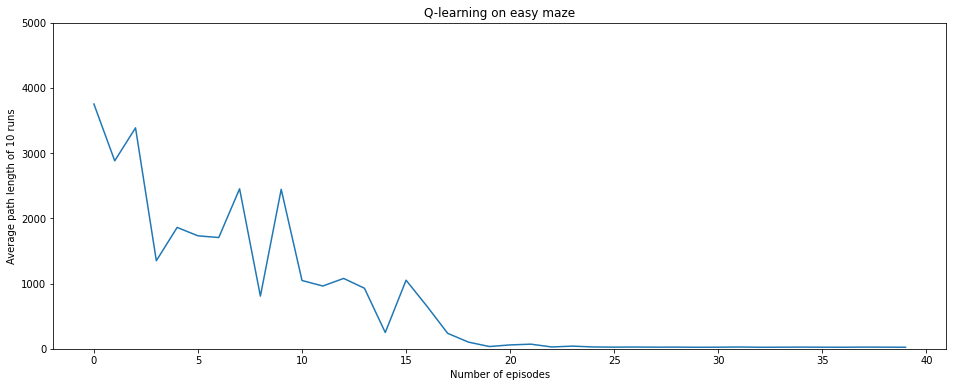

In [5]:
#1.5 and 1.6

# Load the maze
file = "../data/easy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for runNumber in range(10):
    res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(16,6))
plt.title("Q-learning on easy maze")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 5000)

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(1602, 0), (824, 0), (174, 0), (552, 0), (506, 0), (2430, 0), (878, 0), (250, 0), (164, 0), (262, 0), (514, 0), (140, 0), (118, 0), (72, 0), (208, 0), (230, 0), (86, 0), (48, 0), (224, 0), (32, 0), (60, 0), (48, 0), (58, 0), (78, 0), (46, 0), (28, 0), (32, 0), (32, 0), (30, 0), (28, 0), (30, 0), (28, 0), (36, 0), (36, 0), (26, 0), (30, 0), (38, 0), (32, 0), (24, 0), (34, 0)]
Made EGreedy
[(4292, 0), (202, 0), (388, 0), (182, 0), (126, 0), (200, 0), (192, 0), (582, 0), (630, 0), (202, 0), (252, 0), (364, 0), (116, 0), (310, 0), (138, 0), (96, 0), (248, 0), (466, 0), (94, 0), (98, 0), (130, 0), (164, 0), (164, 0), (114, 0), (74, 0), (60, 0), (76, 0), (56, 0), (36, 0), (28, 0), (28, 0), (38, 0), (30, 0), (26, 0), (30, 0), (38, 0), (30, 0), (36, 0), (30, 0), (32, 0)]
Made EGreedy
[(4496, 0), (498, 0), (754, 0), (226, 0), (446, 0), (1000, 0), (718, 0), (1188, 0), (164, 0), (128, 0), (46, 0), (322, 0), (186, 0), (122, 0), (482, 0), (

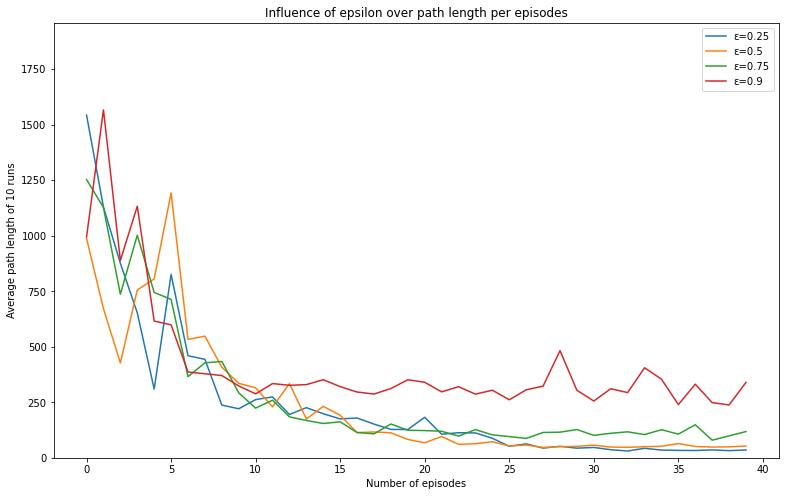

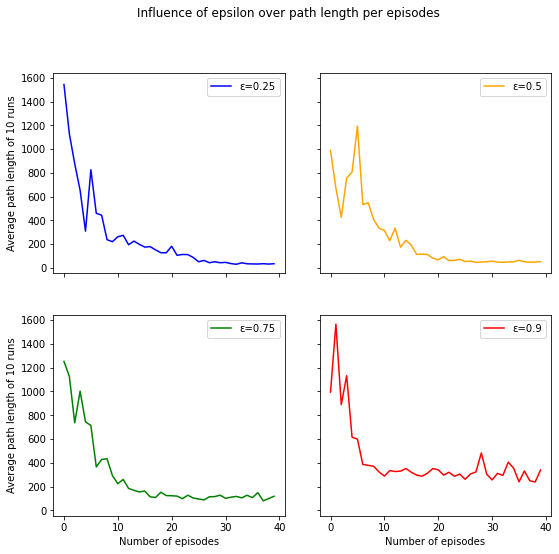

In [6]:
#1.7

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
epsilons = [0.25, 0.5, 0.75, 0.9]

for ind, eps in enumerate(epsilons):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of epsilon over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

import matplotlib.pyplot as plt
import numpy as np

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))
for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, max_y)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(972, 0), (850, 0), (400, 0), (334, 0), (450, 0), (254, 0), (1868, 0), (1588, 0), (430, 0), (124, 0), (240, 0), (108, 0), (196, 0), (112, 0), (292, 0), (734, 0), (296, 0), (40, 0), (214, 0), (410, 0), (226, 0), (98, 0), (72, 0), (104, 0), (80, 0), (76, 0), (46, 0), (26, 0), (26, 0), (30, 0), (24, 0), (26, 0), (24, 0), (28, 0), (28, 0), (30, 0), (26, 0), (32, 0), (32, 0), (28, 0)]
Made EGreedy
[(240, 0), (434, 0), (320, 0), (2240, 0), (836, 0), (888, 0), (1160, 0), (462, 0), (244, 0), (172, 0), (468, 0), (514, 0), (1270, 0), (238, 0), (180, 0), (396, 0), (176, 0), (44, 0), (78, 0), (40, 0), (44, 0), (30, 0), (32, 0), (38, 0), (32, 0), (32, 0), (34, 0), (26, 0), (24, 0), (24, 0), (24, 0), (26, 0), (26, 0), (24, 0), (28, 0), (26, 0), (26, 0), (30, 0), (24, 0), (26, 0)]
Made EGreedy
[(3034, 0), (1046, 0), (632, 0), (102, 0), (962, 0), (1520, 0), (370, 0), (1702, 0), (226, 0), (232, 0), (482, 0), (268, 0), (402, 0), (388, 0), (160, 

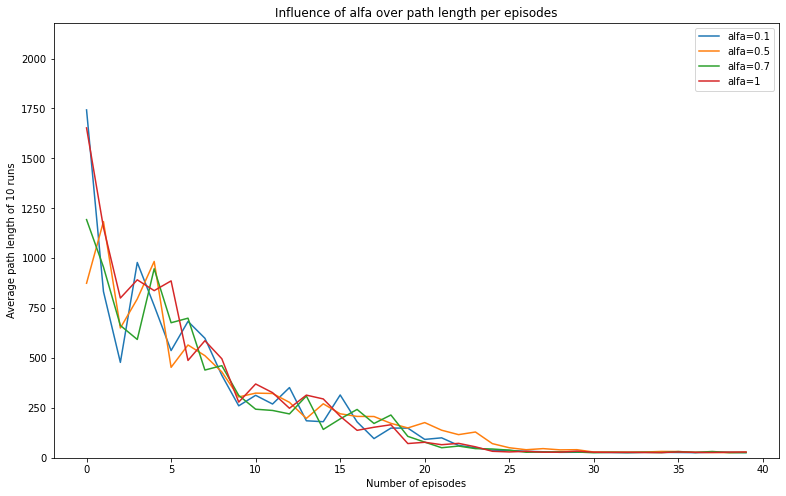

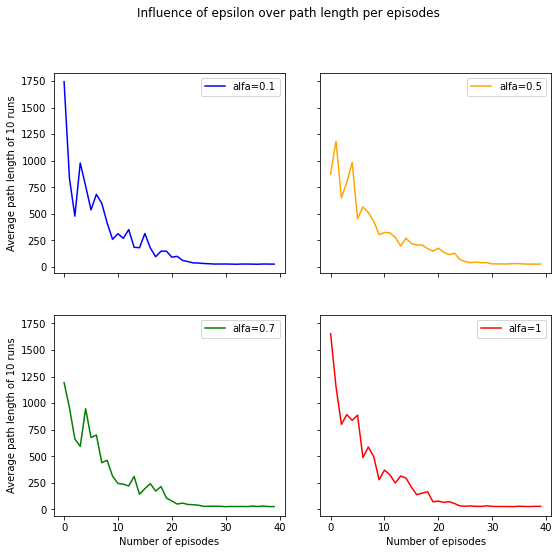

In [7]:
#1.9

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfas = [0.1, 0.5, 0.7, 1]
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for ind, alfa in enumerate(alfas):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of alfa over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

import matplotlib.pyplot as plt
import numpy as np

#print(steps_per_episode)
#print(runs_reaching_episode)

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, 1000)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(674, 0), (1006, 0), (400, 0), (1134, 0), (362, 0), (893, 1), (694, 0), (692, 0), (326, 0), (844, 0), (110, 0), (546, 0), (158, 0), (116, 0), (46, 0), (70, 0), (102, 0), (150, 0), (356, 0), (404, 0), (52, 0), (64, 0), (102, 0), (64, 0), (30, 0), (40, 0), (30, 0), (30, 0), (38, 0), (30, 0), (28, 0), (26, 0), (34, 0), (28, 0), (26, 0), (26, 0), (28, 0), (30, 0), (28, 0), (30, 0), (32, 0), (28, 0), (34, 0), (32, 0), (28, 0), (26, 0), (26, 0), (28, 0), (30, 0), (26, 0), (28, 0), (28, 0), (26, 0), (28, 0), (28, 0), (26, 0), (26, 0), (28, 0), (26, 0), (30, 0), (36, 0), (26, 0), (30, 0), (28, 0), (30, 0), (30, 0), (28, 0), (34, 0), (30, 0), (32, 0), (30, 0), (28, 0), (30, 0), (30, 0), (26, 0), (26, 0), (30, 0), (30, 0), (32, 0), (40, 0), (30, 0), (30, 0), (28, 0), (34, 0), (26, 0), (26, 0), (30, 0), (30, 0), (28, 0), (34, 0), (28, 0), (32, 0), (26, 0), (28, 0), (32, 0), (28, 0), (26, 0), (30, 0), (26, 0), (28, 0), (28, 0), (28, 0), (2

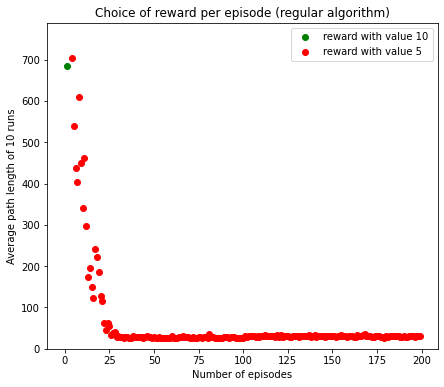

In [8]:
#1.3.10
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
#maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 4
start_eps = 0.1


for runNumber in range(10):
    res = main_algo(alfa=alfa, gamma=gamma, eps=start_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
actual_y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.25)
    actual_y += np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

print(max_y)
plt.figure(figsize=(7,6))
plt.title("Choice of reward per episode (regular algorithm)")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')

y_best = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)
x_index = np.zeros(len(runs_reaching_episode))
for i in range(1, len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)
    
    for j in range(len(x)):
        if y_best[j] < y[j]:
            x_index[j] = i
            y_best[j] = y[j]

for i in range(len(rewards)):
    x_draw = []
    y_draw = []
    for j in range(len(runs_reaching_episode)):
        if x_index[j] == i:
            x_draw.append(j)
            y_draw.append(actual_y[j])

    print(y_draw)
    plt.scatter(x_draw, y_draw, label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


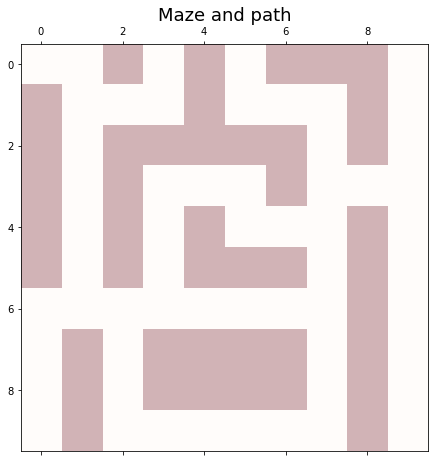

Made EGreedy
[(1767, 1), (915, 1), (605, 1), (683, 1), (227, 1), (395, 1), (937, 1), (919, 1), (659, 1), (159, 1), (293, 1), (222, 0), (408, 0), (186, 0), (329, 1), (191, 1), (112, 0), (195, 1), (539, 1), (202, 0), (175, 1), (185, 1), (324, 0), (216, 0), (324, 0), (147, 1), (195, 1), (89, 1), (50, 0), (230, 0), (129, 1), (76, 0), (92, 0), (153, 1), (291, 1), (166, 0), (249, 1), (182, 0), (132, 0), (64, 0), (254, 0), (117, 1), (281, 1), (76, 0), (74, 0), (198, 0), (145, 1), (162, 0), (154, 0), (148, 0), (132, 0), (174, 0), (98, 0), (73, 1), (115, 1), (106, 0), (108, 0), (113, 1), (133, 1), (146, 0), (166, 0), (102, 0), (86, 0), (84, 0), (83, 1), (72, 0), (132, 0), (86, 0), (96, 0), (66, 0), (76, 0), (74, 0), (65, 1), (76, 0), (130, 0), (66, 0), (86, 0), (114, 0), (46, 0), (54, 0), (38, 0), (78, 0), (74, 0), (96, 0), (48, 0), (48, 0), (80, 0), (46, 0), (74, 0), (78, 0), (88, 0), (72, 0), (52, 0), (42, 0), (64, 0), (72, 0), (78, 0), (60, 0), (96, 0), (78, 0), (56, 0), (80, 0), (90, 0), (6

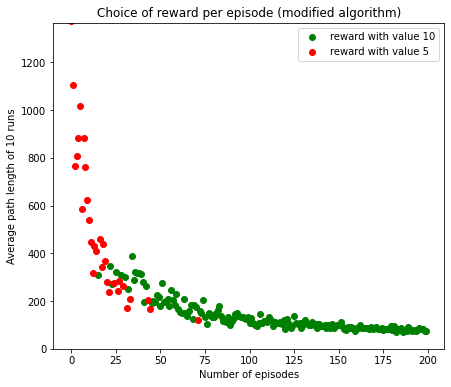

In [9]:
#1.3.11
def mod_algo(maze: Maze, rewards, start_eps=0.1, min_eps=0.1, mult_eps=0.9,alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    eps = start_eps

    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

            eps *= mult_eps
            eps = max(eps, min_eps)


    return steps_per_iter

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 2
start_eps = 1
min_eps = 0.2
mult_eps = 0.995


for runNumber in range(10):
    res = mod_algo(alfa=alfa, gamma=gamma, start_eps=start_eps, min_eps=min_eps, mult_eps=mult_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
actual_y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.25)
    actual_y += np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

print(max_y)
plt.figure(figsize=(7,6))
plt.title("Choice of reward per episode (modified algorithm)")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')

y_best = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)
x_index = np.zeros(len(runs_reaching_episode))
for i in range(1, len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)
    
    for j in range(len(x)):
        if y_best[j] < y[j]:
            x_index[j] = i
            y_best[j] = y[j]

for i in range(len(rewards)):
    x_draw = []
    y_draw = []
    for j in range(len(runs_reaching_episode)):
        if x_index[j] == i:
            x_draw.append(j)
            y_draw.append(actual_y[j])

    print(y_draw)
    plt.scatter(x_draw, y_draw, label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


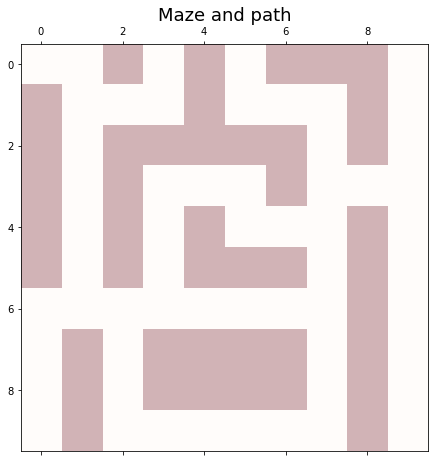

Made EGreedy
[(159, 1), (367, 1), (2037, 1), (1117, 1), (788, 0), (730, 0), (1666, 0), (480, 0), (204, 0), (353, 1), (657, 1), (339, 1), (434, 0), (375, 1), (558, 0), (433, 1), (398, 0), (160, 0), (369, 1), (542, 0), (1008, 0), (391, 1), (287, 1), (346, 0), (134, 0), (109, 1), (445, 1), (285, 1), (289, 1), (115, 1), (216, 0), (136, 0), (114, 0), (219, 1), (120, 0), (141, 1), (194, 0), (238, 0), (109, 1), (144, 0), (104, 0), (56, 0), (81, 1), (134, 0), (79, 1), (100, 0), (57, 1), (98, 0), (224, 0), (82, 0), (86, 0), (150, 0), (99, 1), (100, 0), (90, 0), (84, 0), (117, 1), (94, 0), (100, 0), (86, 0), (116, 0), (82, 0), (140, 0), (132, 0), (82, 0), (124, 0), (98, 0), (88, 0), (105, 1), (54, 0), (153, 1), (55, 1), (151, 1), (84, 0), (158, 0), (31, 1), (92, 0), (157, 1), (70, 0), (38, 0), (74, 0), (54, 0), (86, 0), (98, 0), (64, 0), (57, 1), (98, 0), (56, 0), (69, 1), (39, 1), (82, 0), (46, 0), (63, 1), (83, 1), (64, 0), (79, 1), (58, 0), (62, 0), (44, 0), (52, 0), (52, 0), (92, 0), (78, 0)

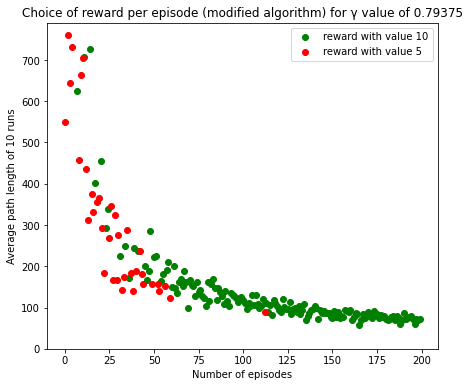

In [10]:
#1.3.12
def mod_algo(maze: Maze, rewards, start_eps=0.1, min_eps=0.1, mult_eps=0.9,alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    eps = start_eps

    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

            eps *= mult_eps
            eps = max(eps, min_eps)


    return steps_per_iter

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.79375
max_episodes = 200
max_iterations = 30000 * 2
start_eps = 1
min_eps = 0.2
mult_eps = 0.995

for runNumber in range(10):
    res = mod_algo(alfa=alfa, gamma=gamma, start_eps=start_eps, min_eps=min_eps, mult_eps=mult_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)

    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
actual_y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.25)
    actual_y += np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

print(max_y)
plt.figure(figsize=(7,6))
plt.title("Choice of reward per episode (modified algorithm) for γ value of " + str(gamma))
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')

y_best = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)
x_index = np.zeros(len(runs_reaching_episode))
for i in range(1, len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)
    
    for j in range(len(x)):
        if y_best[j] < y[j]:
            x_index[j] = i
            y_best[j] = y[j]

for i in range(len(rewards)):
    x_draw = []
    y_draw = []
    for j in range(len(runs_reaching_episode)):
        if x_index[j] == i:
            x_draw.append(j)
            y_draw.append(actual_y[j])

    print(y_draw)
    plt.scatter(x_draw, y_draw, label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y * 1.1)
plt.legend()